# Scrapping three websites to analyze the price of used Rolex watches

In [246]:
# Dependencies
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# URL of page to be scraped
therealreal_url = 'https://www.therealreal.com/designers/rolex/watches?path%5B%5D=rolex&path%5B%5D=watches&available=1'


In [3]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser("chrome", **executable_path, headless=False)

[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280
[WDM] - Driver [/Users/AliciaLy/.wdm/drivers/chromedriver/mac64/87.0.4280.88/chromedriver] found in cache


In [4]:
browser.visit(therealreal_url)


In [5]:
html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [6]:
# Examine the results, then determine element that contains sought info
print(soup.prettify())

<html class="responsive-layout-active trr23 trr23v1 trr117 trr117v1" lang="en">
 <head data-optly-12c025136bfc4d4dbce8dc18d7580d31="" data-optly-c234baef-3c62-4a75-ace8-4df15c707809="" data-optly-efb0f3a7-2d51-4411-adf2-70a1736a9bce="">
  <script async="" src="https://b1img.com/js_container?site_id=158e617f003b40f8a79e62eab20f56b1&amp;type=1&amp;callback=b1Ctn.parseUuidResponse" type="text/javascript">
  </script>
  <script async="" src="https://tags.b1js.com/tags/158e617f003b40f8a79e62eab20f56b1.js" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript">
  </script>
  <script async="" src="https://sf19-scmcdn-va.ibytedtos.com/goofy/track-log-international/ad/business/v4.1.8/track-log.js" type="text/javascript">
  </script>
  <script async="" src="//d.impactradius-event.com/A1225650-eef4-4193-a7a5-ab3a4ac88aa81.js">
  </script>
  <script async="" src="https://nextdoor.com/static/pixel/pixel.js">
  </script>


In [7]:
# results are returned as an iterable list
all_results = soup.find_all('div', class_="product-card-wrapper")
all_results

[<div class="product-card-wrapper js-product-card-wrapper"><a class="product-card js-plp-product-card" data-product-id="15160872" href="/products/watches/bracelet/rolex-datejust-watch-90y7c?position=1"><div class="product-card-aligner"><div class="product-card-images"><div class="product-card-image"><img alt="Rolex Datejust Watch" class="product-card-image__img product-card-image__img--one" role="presentation" sizes="(max-width: 760px) 360px, 220px" src="https://product-images.therealreal.com/RLX29657_1_enlarged.jpg?width=220" srcset="https://product-images.therealreal.com/RLX29657_1_enlarged.jpg?width=110 110w, https://product-images.therealreal.com/RLX29657_1_enlarged.jpg?width=220 220w, https://product-images.therealreal.com/RLX29657_1_enlarged.jpg?width=440 440w, https://product-images.therealreal.com/RLX29657_1_enlarged.jpg?width=660 660w"/><img alt="Rolex Datejust Watch" class="product-card-image__img product-card-image__img--two" role="presentation" sizes="(max-width: 760px) 360

In [20]:
# product_detail = soup.find_all('div', class_="product-card__details")
# product_detail

# len(product_detail)

In [40]:
title_list = []
model_list = []
price_list = []
product_id_list = []
link_list = []

# Loop through returned results
for result in all_results:
    # Error handling
    try:
        
        # Identify and return price of listing
        price = result.find('div', class_="product-card__msrp").text
        price_list.append(price)
        
        # Identify and return title of listing
        title = result.find('div', class_="product-card__brand").text
        title_list.append(title)
        # Identify the model of listing
        model = result.find('div', class_="product-card__description").text
        model_list.append(model)
#         price = result.a.span.text
        # Identify and return link to listing
        product_id = result.a['data-product-id']
        product_id_list.append(product_id)
        
        link = result.a['href']
        link_list.append("https://www.therealreal.com"+ link)
   
           
    except AttributeError as e:
#         print(e)
        pass

In [41]:
len(title_list)

101

In [174]:
realreal_df = pd.DataFrame({"id": product_id_list,
                            "title": title_list,
                            "model": model_list,
                            "price": price_list,
                            "link": link_list})
realreal_df

,id,title,model,price,link
0,15160872,Rolex,Datejust Watch,"Est. Retail $8,700.00",https://www.therealreal.com/products/watches/b...
1,15045153,Rolex,Datejust Watch,"Est. Retail $8,700.00",https://www.therealreal.com/products/watches/b...
2,15038890,Rolex,Datejust Watch,"Est. Retail $8,100.00",https://www.therealreal.com/products/watches/b...
3,14972725,Rolex,Day-Date Watch,"Est. Retail $32,450.00",https://www.therealreal.com/products/watches/b...
4,15085516,Rolex,Datejust Watch,"Est. Retail $8,300.00",https://www.therealreal.com/products/watches/b...
...,...,...,...,...,...
96,11438392,Rolex,Datejust Watch,"Est. Retail $6,200.00",https://www.therealreal.com/products/watches/b...
97,10324311,Rolex,Datejust Watch,"Est. Retail $7,250.00",https://www.therealreal.com/products/watches/b...
98,10309686,Rolex,Datejust Watch,"Est. Retail $7,450.00",https://www.therealreal.com/products/watches/b...
99,9509765,Rolex,Datejust Watch,"Est. Retail $7,150.00",https://www.therealreal.com/products/watches/b...


In [175]:
# Use apply method to remove the EST retail from the column "Price", the x["price"] means apply to each row
realreal_df["price"] = realreal_df.apply(lambda x: x["price"].replace("Est. Retail", ""), axis=1)


In [176]:
realreal_df

,id,title,model,price,link
0,15160872,Rolex,Datejust Watch,"$8,700.00",https://www.therealreal.com/products/watches/b...
1,15045153,Rolex,Datejust Watch,"$8,700.00",https://www.therealreal.com/products/watches/b...
2,15038890,Rolex,Datejust Watch,"$8,100.00",https://www.therealreal.com/products/watches/b...
3,14972725,Rolex,Day-Date Watch,"$32,450.00",https://www.therealreal.com/products/watches/b...
4,15085516,Rolex,Datejust Watch,"$8,300.00",https://www.therealreal.com/products/watches/b...
...,...,...,...,...,...
96,11438392,Rolex,Datejust Watch,"$6,200.00",https://www.therealreal.com/products/watches/b...
97,10324311,Rolex,Datejust Watch,"$7,250.00",https://www.therealreal.com/products/watches/b...
98,10309686,Rolex,Datejust Watch,"$7,450.00",https://www.therealreal.com/products/watches/b...
99,9509765,Rolex,Datejust Watch,"$7,150.00",https://www.therealreal.com/products/watches/b...


In [177]:
# Removed the Est Retail and $ from the 
# realreal_df = realreal_df.applymap(lambda x: str(x).lstrip(" Est. Retail $"))
# realreal_df

In [180]:
# remove the $ sign from price
realreal_df["price"] = realreal_df["price"].str.replace("$", "")
realreal_df["price"] = realreal_df["price"].str.replace(",", "")
realreal_df

,id,title,model,price,link
0,15160872,Rolex,Datejust Watch,8700.00,https://www.therealreal.com/products/watches/b...
1,15045153,Rolex,Datejust Watch,8700.00,https://www.therealreal.com/products/watches/b...
2,15038890,Rolex,Datejust Watch,8100.00,https://www.therealreal.com/products/watches/b...
3,14972725,Rolex,Day-Date Watch,32450.00,https://www.therealreal.com/products/watches/b...
4,15085516,Rolex,Datejust Watch,8300.00,https://www.therealreal.com/products/watches/b...
...,...,...,...,...,...
96,11438392,Rolex,Datejust Watch,6200.00,https://www.therealreal.com/products/watches/b...
97,10324311,Rolex,Datejust Watch,7250.00,https://www.therealreal.com/products/watches/b...
98,10309686,Rolex,Datejust Watch,7450.00,https://www.therealreal.com/products/watches/b...
99,9509765,Rolex,Datejust Watch,7150.00,https://www.therealreal.com/products/watches/b...


In [181]:
realreal_df.dtypes

id       object
title    object
model    object
price    object
link     object
dtype: object

In [182]:
realreal_df["price"] = realreal_df["price"].astype("float")

In [183]:
realreal_df.dtypes


id        object
title     object
model     object
price    float64
link      object
dtype: object

In [184]:
realreal_df.to_csv("realreal.csv", index=False)


In [237]:
# Looking at the summary in price of different watches and group by their models
model_describe = realreal_df.groupby("model").describe()["price"]
model_describe

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
Air-King Watch,6.0,5191.666667,120.069424,5050.0,5100.00,5200.0,5300.0,5300.0
Cellini Watch,2.0,7250.000000,1484.924240,6200.0,6725.00,7250.0,7775.0,8300.0
Date Watch,3.0,6000.000000,556.776436,5400.0,5750.00,6100.0,6300.0,6500.0
Datejust II Watch,4.0,9961.250000,789.413020,9195.0,9536.25,9800.0,10225.0,11050.0
Datejust Watch,64.0,11171.875000,6746.351895,6200.0,7631.25,8700.0,11850.0,47450.0
Day-Date Masterpiece Watch,1.0,97300.000000,NaN,97300.0,97300.00,97300.0,97300.0,97300.0
Day-Date Watch,5.0,40990.000000,12519.854232,31150.0,32450.00,33150.0,49000.0,59200.0
Deepsea Sea-Dweller Watch,1.0,12600.000000,NaN,12600.0,12600.00,12600.0,12600.0,12600.0
Explorer II Watch,1.0,8100.000000,NaN,8100.0,8100.00,8100.0,8100.0,8100.0


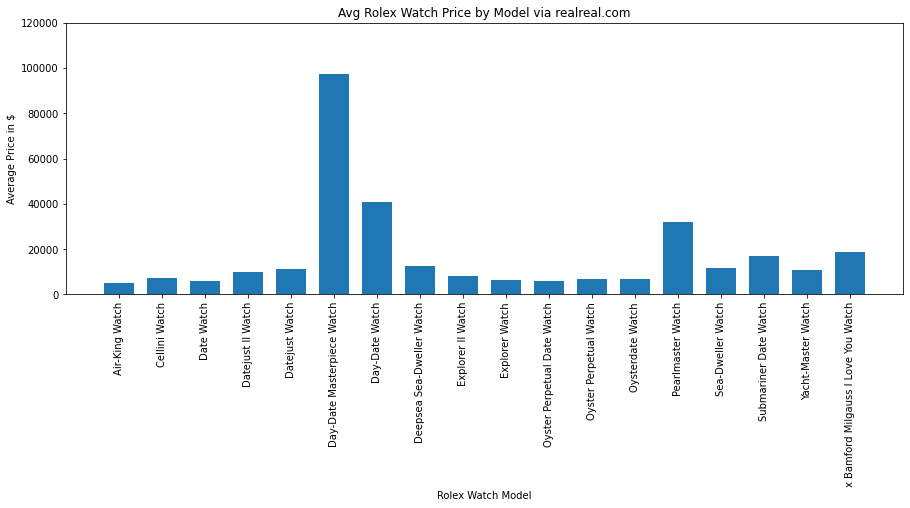

In [296]:
fig = plt.figure(figsize=(15,5))
# model_count = realreal_df['model'].value_counts()
model_avg_price = realreal_df.groupby("model")["price"].mean()
# model_avg_price                         

x_axis = np.arange(len(model_avg_price))
# x_axis

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, model_avg_price.index.values)

# # creating the bar chart
plt.bar(x_axis, model_avg_price, width = 0.7)

# # Rotate the x_axis name to 90 degrees 
plt.xticks(rotation=90)
plt.ylim(0, 120000)
plt.title("Avg Rolex Watch Price by Model via realreal.com")
plt.xlabel("Rolex Watch Model")
plt.ylabel("Average Price in $")
plt.savefig("avg_price_realreal.png")

In [185]:
browser.quit()

# Scrapping from crownandcaliber.com

In [123]:
crownandcaliber1_url = 'https://www.crownandcaliber.com/collections/rolex-watches#/perpage:60'


In [124]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser("chrome", **executable_path, headless=False)

[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280
[WDM] - Driver [/Users/AliciaLy/.wdm/drivers/chromedriver/mac64/87.0.4280.88/chromedriver] found in cache


In [125]:
browser.visit(crownandcaliber1_url)


In [126]:
html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [127]:
# Examine the results, then determine element that contains sought info
print(soup.prettify())

<html class="cookies cors json queryselector websockets supports no-touchevents cssanimations csstransforms3d csstransitions" data-triggered="true" lang="en">
 <head>
  <link href="https://icon-cdn.shopsheriff.com/user/crown-and-caliber/icons/152-2.png" rel="apple-touch-icon" sizes="152x152"/>
  <link href="https://icon-cdn.shopsheriff.com/user/crown-and-caliber/icons/167-2.png" rel="apple-touch-icon" sizes="167x167"/>
  <link href="https://icon-cdn.shopsheriff.com/user/crown-and-caliber/icons/180-2.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="https://icon-cdn.shopsheriff.com/user/crown-and-caliber/icons/1024-2.png" rel="apple-touch-icon"/>
  <style type="text/css">
   @charset "UTF-8";[ng\:cloak],[ng-cloak],[data-ng-cloak],[x-ng-cloak],.ng-cloak,.x-ng-cloak,.ng-hide{display:none !important;}ng\:form{display:block;}.ng-animate-block-transitions{transition:0s all!important;-webkit-transition:0s all!important;}.ng-hide-add-active,.ng-hide-remove{display:block!important;}
 

In [128]:
# results are returned as an iterable list
crown_result1 = soup.find_all('div', class_="popular-watches--card text-center")
crown_result1

[<div class="popular-watches--card text-center"> <a class="grid-view-item__link" href="//www.crownandcaliber.com/products/rolex-submariner-126610-10-10-rol-01zl8s" intellisuggest="" ss-ps=""> <div class="img-holder"> <span class="view-detail">VIEW DETAILS</span> <!-- ngRepeat: badge in result.badges track by $index --> <img class="lazy ng-isolate-scope" data-src="//cdn.shopify.com/s/files/1/1889/5061/products/Rolex-Submariner-126610-10-10-ROL-01ZL8S-cb05467b5cf2_3fcd8a05-ddd9-4dd7-bdf7-c78af4188fa0_340x.jpg?v=1609974497" ng-src="//cdn.shopify.com/s/files/1/1889/5061/files/image_loading_2.gif?v=2425928497426709530" onerror="this.src='//cdn.searchspring.net/ajax_search/img/default_image.png';" src="//cdn.shopify.com/s/files/1/1889/5061/products/Rolex-Submariner-126610-10-10-ROL-01ZL8S-cb05467b5cf2_3fcd8a05-ddd9-4dd7-bdf7-c78af4188fa0_340x.jpg?v=1609974497" ss-lazy-src="result.thumbnailImageUrl" style=""/> </div> <div class="card-title ng-binding">Rolex</div> <div class="card-subTitle ng-

In [113]:
# print(crown_result1[0].a)

In [129]:
len(crown_result1)

60

In [130]:
all_data = []
for page in range(1, 5):
    crownandcaliber1_url = f'https://www.crownandcaliber.com/collections/rolex-watches?page={page}#/perpage:60'
#     crownandcaliber1_url = f'https://www.crownandcaliber.com/collections/rolex-watches?page={page}'
#     response = requests.get(crownandcaliber1_url)
    browser.visit(crownandcaliber1_url)
    time.sleep(5)
    html = browser.html
    soup = BeautifulSoup(html, "html.parser")
    crown_result1 = soup.find_all('div', class_="popular-watches--card text-center")
    
    print(f'-------{page}------')
    for result in crown_result1:
        try: 
        # Identify and return title of listing
            title = result.find('div', class_="card-title ng-binding").text
        # Identify the model of listing
            model = result.find('div', class_="card-subTitle ng-binding").text
            # Identify and return price of listing
            price = result.find('span', class_="current-price product-price__price ng-binding").text
            link = result.a['href']
            product_id = result.find('div', class_="card-barcode ng-binding").text

            all_data.append(
                {
                    "id":product_id,
                    "title": title,
                    "model": model,
                    "price": price.replace("$", "").replace(",", ""),
                    "link":"https:"+link
                }
            )

  
        except:
            pass


-------1------
-------2------
-------3------
-------4------


In [131]:
all_data

[{'id': '126610',
  'title': 'Rolex',
  'model': 'Submariner',
  'price': '14200',
  'link': 'https://www.crownandcaliber.com/products/rolex-submariner-126610-10-10-rol-01zl8s'},
 {'id': '116400',
  'title': 'Rolex',
  'model': 'Milgauss',
  'price': '7775',
  'link': 'https://www.crownandcaliber.com/products/rolex-milgauss-116400-10-10-rol-0fqzge'},
 {'id': '116200',
  'title': 'Rolex',
  'model': 'Datejust',
  'price': '6775',
  'link': 'https://www.crownandcaliber.com/products/rolex-datejust-116200-10-10-rol-15mgce'},
 {'id': '126710',
  'title': 'Rolex',
  'model': 'GMT-Master II',
  'price': '18875',
  'link': 'https://www.crownandcaliber.com/products/rolex-gmt-master-ii-126710-10-10-rol-6f5mvn'},
 {'id': '116610LV',
  'title': 'Rolex',
  'model': 'Submariner',
  'price': '17325',
  'link': 'https://www.crownandcaliber.com/products/rolex-submariner-116610lv-10-10-rol-7racy8'},
 {'id': '116200',
  'title': 'Rolex',
  'model': 'Datejust',
  'price': '6775',
  'link': 'https://www.cr

In [132]:
new_df = pd.DataFrame(all_data)
new_df
new_df["price"] = new_df["price"].astype("float")

In [133]:
len(new_df)

240

In [136]:
new_df.sort_values("id", inplace=True)

In [137]:
new_df

,id,title,model,price,link
45,114060,Rolex,Submariner,10175.0,https://www.crownandcaliber.com/products/rolex...
103,114060,Rolex,Submariner,10775.0,https://www.crownandcaliber.com/products/rolex...
106,114060,Rolex,Submariner,10975.0,https://www.crownandcaliber.com/products/rolex...
120,114060,Rolex,Submariner,10375.0,https://www.crownandcaliber.com/products/rolex...
63,114060,Rolex,Submariner,10975.0,https://www.crownandcaliber.com/products/rolex...
...,...,...,...,...,...
220,6265,Rolex,Daytona,63000.0,https://www.crownandcaliber.com/products/rolex...
10,6633/9,Rolex,Cellini,4225.0,https://www.crownandcaliber.com/products/rolex...
195,67198,Rolex,Oyster Perpetual,6075.0,https://www.crownandcaliber.com/products/rolex...
41,69173,Rolex,Datejust,4050.0,https://www.crownandcaliber.com/products/rolex...


In [138]:
new_df.dtypes

id        object
title     object
model     object
price    float64
link      object
dtype: object

In [139]:
len(new_df["link"].unique())

240

In [140]:
new_df.to_csv("crownandcaliber.csv", index=False)

In [241]:
watch_describe_df = new_df.groupby("model").describe()["price"]
watch_describe_df

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
Air-King,13.0,5548.076923,1785.603934,2800.0,4150.0,4850.0,7400.00,7550.0
Cellini,1.0,4225.000000,NaN,4225.0,4225.0,4225.0,4225.00,4225.0
Cellini Dual Time,1.0,15250.000000,NaN,15250.0,15250.0,15250.0,15250.00,15250.0
Cellini Time,2.0,11050.000000,1378.858223,10075.0,10562.5,11050.0,11537.50,12025.0
Date,6.0,4875.000000,1218.092772,4150.0,4150.0,4200.0,5112.50,7150.0
Datejust,34.0,7324.264706,1444.772254,4050.0,6425.0,6875.0,8106.25,10975.0
Datejust II,8.0,8678.125000,169.788471,8350.0,8612.5,8762.5,8800.00,8800.0
Datejust Turn-O-Graph,6.0,7541.666667,559.389548,6700.0,7475.0,7475.0,7625.00,8450.0
Day Date President,1.0,6825.000000,NaN,6825.0,6825.0,6825.0,6825.00,6825.0


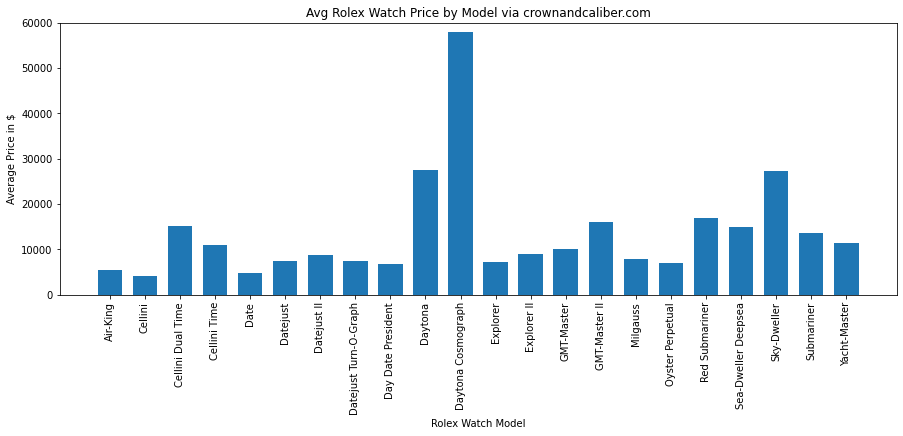

In [295]:
fig = plt.figure(figsize=(15,5))
# model_count = realreal_df['model'].value_counts()
model_avg_prices = new_df.groupby("model")["price"].mean()
# model_avg_price                         

x_axis = np.arange(len(model_avg_prices))
# x_axis

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, model_avg_prices.index.values)

# # creating the bar chart
plt.bar(x_axis, model_avg_prices, width = 0.7)

# # Rotate the x_axis name to 90 degrees 
plt.xticks(rotation=90)
plt.ylim(0, 60000)
plt.title("Avg Rolex Watch Price by Model via crownandcaliber.com")
plt.xlabel("Rolex Watch Model")
plt.ylabel("Average Price in $")
plt.savefig("avg_price_crownandcaliber.png")

In [200]:
browser.quit()

# Scrapping from thewatchbox.com

In [201]:
watchbox_url = 'https://www.thewatchbox.com/watches/rolex/?keyword=%2Bpreowned%20%2Brolex&adpos=&utm_content=409786623045&utm_source=google&utm_medium=cpc&utm_campaign=rolexEused&gclid=CjwKCAiAi_D_BRApEiwASslbJ3G8B1xx9Co-_peGaPFGer3yCtsaWrj2N6j-FU7l2e_IjxPuNrqn-hoCFzwQAvD_BwE'


In [202]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser("chrome", **executable_path, headless=False)

[WDM] - Current google-chrome version is 87.0.4280
[WDM] - Get LATEST driver version for 87.0.4280
[WDM] - Driver [/Users/AliciaLy/.wdm/drivers/chromedriver/mac64/87.0.4280.88/chromedriver] found in cache


In [203]:
browser.visit(watchbox_url)

In [189]:
html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [191]:
# browser.click_link_by_partial_text("LOAD MORE")

In [204]:
# Examine the results, then determine element that contains sought info
print(soup.prettify())

<html class="veiled crjs" lang="en" style="position: relative;">
 <head>
  <link href="https://www.thewatchbox.com/watches/rolex/" rel="canonical"/>
  <meta content="https://www.thewatchbox.com/watches/rolex/" property="og:url"/>
  <!--[if gt IE 9]><!-->
  <script async="" src="https://widget.intercom.io/widget/kf9hsoo6" type="text/javascript">
  </script>
  <script async="" src="https://beacon.riskified.com?shop=production-na01-watchbox.demandware.net&amp;sid=1g8P-1kyOx5bCTu4HOiHbdLYigS2Q-cqQW8=" type="text/javascript">
  </script>
  <script async="" src="https://vxml4.plavxml.com/sited/ref/integration.jsp?sessid=CjwKCAiAi_D_BRApEiwASslbJ3G8B1xx9Co-_peGaPFGer3yCtsaWrj2N6j-FU7l2e_IjxPuNrqn-hoCFzwQAvD_BwE&amp;uacid=326620184.1610515241" type="text/javascript">
  </script>
  <script async="" src="https://s1.listrakbi.com/dVibVXg5Xxse/session/getIds?callback=ltkCallback7757&amp;gsid=526d82fd-49b4-4b0c-a63c-02de6f05491f&amp;_sid=bbe071de-8dea-4897-9889-5d88c54721d0&amp;_tid=492246&amp;ps=n

In [205]:
# results are returned as an iterable list
watchbox_result = soup.find_all('div', class_="tile-body")
watchbox_result


[<div class="tile-body">
 <div class="pdp-link" itemprop="name">
 <div class="productbrandname">
 <a class="link" href="/shop/4370144.html" itemprop="url">Rolex</a>
 </div>
 <div class="productname">
 <a class="link" href="/shop/4370144.html">Submariner</a>
 </div>
 <div class="productid">
 <a class="link" href="/shop/4370144.html">126619LB</a>
 </div>
 </div>
 <p class="watchyear-value watchyear-value-empty"></p>
 <meta content="Rolex" itemprop="brand"/>
 <meta content="Pre-Owned Rolex Submariner Date (126619LB) self - winding automatic watch, features a 41mm 18k white gold case with a blue Cerachrom bezel surrounding a black dial on an 18k white gold Oyster bracelet with folding buckle. Functions include hours, minutes, seconds and date. This watch comes complete with box and papers. Scattered Serial.
 
 Majority of time remaining on the factory warranty!
 
 This watch will be ready to ship in 5-7 days!" itemprop="description"/>
 <meta content="4370144" itemprop="sku"/>
 <meta conten

In [209]:
watchbox_data = []
# for page in range(1, 5):
for x in range(5):
    watchbox_url = f'https://www.thewatchbox.com/watches/rolex/?keyword=%2Bpreowned%20%2Brolex&adpos=&utm_content=409786623045&utm_source=google&utm_medium=cpc&utm_campaign=rolexEused&gclid=CjwKCAiAi_D_BRApEiwASslbJ3G8B1xx9Co-_peGaPFGer3yCtsaWrj2N6j-FU7l2e_IjxPuNrqn-hoCFzwQAvD_BwE'
    browser.visit(watchbox_url)
    html = browser.html
    soup = BeautifulSoup(html, "html.parser")
    watchbox_result = soup.find_all('div', class_="tile-body")
    print(f'-------{x}------')
  
    for result in watchbox_result:
        try: 
            wproduct_id = result.find('div', class_="productid").text
            wtitle = result.find('div', class_="productbrandname").text
            wmodel = result.find('div', class_="productname").text
            wprice = result.find('span', class_="value").text
            wlink = result.a['href']
      
            

            watchbox_data.append(
                {
                    "id":wproduct_id,
                    "title": wtitle,
                    "model": wmodel,
                    "price": wprice.replace("$", "").replace(",", ""),
                    "link":"https://www.thewatchbox.com"+wlink
                }
            )

  
        except:
            pass



-------0------
-------1------
-------2------
-------3------
-------4------


In [210]:
watchbox_data

[{'id': '\n126619LB\n',
  'title': '\nRolex\n',
  'model': '\nSubmariner\n',
  'price': '\n52950\n\n\n\n',
  'link': 'https://www.thewatchbox.com/shop/4370144.html'},
 {'id': '\n118398\n',
  'title': '\nRolex\n',
  'model': '\nDay-Date\n',
  'price': '\n52950\n\n\n\n',
  'link': 'https://www.thewatchbox.com/shop/4321592.html'},
 {'id': '\n279138RBR\n',
  'title': '\nRolex\n',
  'model': '\nDatejust\n',
  'price': '\n23250\n\n\n\n',
  'link': 'https://www.thewatchbox.com/shop/4294740.html'},
 {'id': '\n79174\n',
  'title': '\nRolex\n',
  'model': '\nDatejust\n',
  'price': '\n3750\n\n\n\n',
  'link': 'https://www.thewatchbox.com/shop/4334470.html'},
 {'id': '\n126619LB\n',
  'title': '\nRolex\n',
  'model': '\nSubmariner\n',
  'price': '\n53950\n\n\n\n',
  'link': 'https://www.thewatchbox.com/shop/4385753.html'},
 {'id': '\n228239\n',
  'title': '\nRolex\n',
  'model': '\nDay-Date\n',
  'price': '\n37950\n\n\n\n',
  'link': 'https://www.thewatchbox.com/shop/4380283.html'},
 {'id': '\n16

In [211]:
watchbox_df = pd.DataFrame(watchbox_data)
watchbox_df


,id,title,model,price,link
0,\n126619LB\n,\nRolex\n,\nSubmariner\n,\n52950\n\n\n\n,https://www.thewatchbox.com/shop/4370144.html
1,\n118398\n,\nRolex\n,\nDay-Date\n,\n52950\n\n\n\n,https://www.thewatchbox.com/shop/4321592.html
2,\n279138RBR\n,\nRolex\n,\nDatejust\n,\n23250\n\n\n\n,https://www.thewatchbox.com/shop/4294740.html
3,\n79174\n,\nRolex\n,\nDatejust\n,\n3750\n\n\n\n,https://www.thewatchbox.com/shop/4334470.html
4,\n126619LB\n,\nRolex\n,\nSubmariner\n,\n53950\n\n\n\n,https://www.thewatchbox.com/shop/4385753.html
...,...,...,...,...,...
235,\n216570\n,\nRolex\n,\nExplorer II\n,\n9750\n\n\n\n,https://www.thewatchbox.com/shop/4360723.html
236,\n116233\n,\nRolex\n,\nDatejust\n,\n9450\n\n\n\n,https://www.thewatchbox.com/shop/4350534.html
237,\n126334\n,\nRolex\n,\nDatejust\n,\n11350\n\n\n\n,https://www.thewatchbox.com/shop/4367629.html
238,\n116400GV\n,\nRolex\n,\nMilgauss\n,\n10950\n\n\n\n,https://www.thewatchbox.com/shop/4375358.html


In [214]:
watchbox_df = watchbox_df.replace("\n", "", regex=True)
watchbox_df


,id,title,model,price,link
0,126619LB,Rolex,Submariner,52950,https://www.thewatchbox.com/shop/4370144.html
1,118398,Rolex,Day-Date,52950,https://www.thewatchbox.com/shop/4321592.html
2,279138RBR,Rolex,Datejust,23250,https://www.thewatchbox.com/shop/4294740.html
3,79174,Rolex,Datejust,3750,https://www.thewatchbox.com/shop/4334470.html
4,126619LB,Rolex,Submariner,53950,https://www.thewatchbox.com/shop/4385753.html
...,...,...,...,...,...
235,216570,Rolex,Explorer II,9750,https://www.thewatchbox.com/shop/4360723.html
236,116233,Rolex,Datejust,9450,https://www.thewatchbox.com/shop/4350534.html
237,126334,Rolex,Datejust,11350,https://www.thewatchbox.com/shop/4367629.html
238,116400GV,Rolex,Milgauss,10950,https://www.thewatchbox.com/shop/4375358.html


In [284]:
watchbox_df["price"] = watchbox_df["price"].astype("float")


In [286]:
watchbox_df.dtypes

id        object
title     object
model     object
price    float64
link      object
dtype: object

In [287]:
watchbox_df.to_csv("watchbox_df.csv", index=False)


In [216]:
browser.quit()

In [288]:
watchbox_describe_df = watchbox_df.groupby("model").describe()["price"]
watchbox_describe_df

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
Air-King,15.0,4950.000000,845.154255,3950.0,3950.0,4950.0,5950.0,5950.0
Cellini,5.0,4750.000000,0.000000,4750.0,4750.0,4750.0,4750.0,4750.0
Datejust,55.0,10713.636364,8130.449480,3250.0,3850.0,6750.0,21450.0,24950.0
Day-Date,35.0,35450.000000,15994.024620,7950.0,15450.0,41950.0,47950.0,52950.0
Daytona,10.0,30450.000000,15284.342024,15950.0,15950.0,30450.0,44950.0,44950.0
Explorer II,5.0,9750.000000,0.000000,9750.0,9750.0,9750.0,9750.0,9750.0
GMT-Master,15.0,11950.000000,2352.809870,8950.0,8950.0,12450.0,14450.0,14450.0
GMT-Master II,5.0,13450.000000,0.000000,13450.0,13450.0,13450.0,13450.0,13450.0
Milgauss,5.0,10950.000000,0.000000,10950.0,10950.0,10950.0,10950.0,10950.0


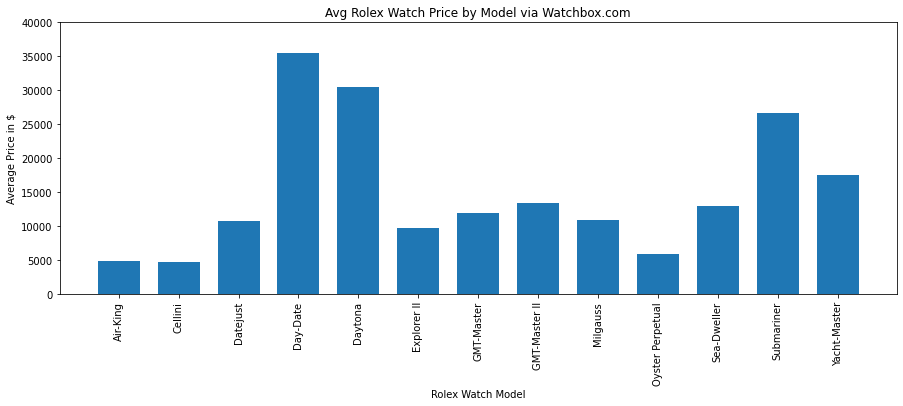

In [294]:
fig = plt.figure(figsize=(15,5))
# model_count = realreal_df['model'].value_counts()
models_avg_prices = watchbox_df.groupby("model")["price"].mean()
# models_avg_price                         

x_axis = np.arange(len(models_avg_prices))
# x_axis

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, models_avg_prices.index.values)

# # creating the bar chart
plt.bar(x_axis, models_avg_prices, width = 0.7)

# # Rotate the x_axis name to 90 degrees 
plt.xticks(rotation=90)
plt.ylim(0, 40000)
plt.title("Avg Rolex Watch Price by Model via Watchbox.com")
plt.xlabel("Rolex Watch Model")
plt.ylabel("Average Price in $")
plt.savefig("avg_price_watchbox.png")